In [258]:
import pandas as pd
import plotly.graph_objects as go
import pymongo 
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns

### Info from Mongo DB

Mongo DB connect

In [5]:
user = "readerAlla" 
password = "t3mi2zmncdH7thiHAHDp" 
host = "10.10.100.72" 
port = 27017 
database = 'test' # name of database

In [7]:
client = MongoClient(f'mongodb://{user}:{password}@{host}:{port}/{database}')

In [9]:
# check existing databases
client.list_database_names()

['admin', 'config', 'local', 'san_logs', 'sandwiches', 'test']

Choosing db and collection to use

In [14]:
db = client['test']

In [16]:
collection_name = 'tokensInfo'
collection = db[collection_name] 

Query and creating df for query

In [31]:
query = {}
# Projection to include address and name fields only, excluding _id
projection = { 'address': 1, 'name': 1, '_id': 0 }

# Execute the query with the projection and limit the results to 5 documents
cursor = collection.find(query, projection)

cursor

#### Tokens info

In [33]:
token_from_mongo = pd.DataFrame(list(cursor))
token_from_mongo

,address,name
0,0x2f8221e82e0d4669ad66eabf02a5baed43ea49e7,Newsly
1,0xc6bdb96e29c38dc43f014eed44de4106a6a8eb5f,Inu Inu
2,0x02020595e6a34a03a8e9c1f5624b1b7713810083,Spectra Chain
3,0xe970d68d29d6e89010110573c955f015ab11099f,Andy
4,0xd59d7d2e955533fcd21641da8a70eae9624a3c49,MagicRing
5,0x70bef3bb2f001da2fddb207dae696cd9faff3f5d,Ninja Squad Token
6,0x68bbed6a47194eff1cf514b50ea91895597fc91e,Andy
7,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether USD
8,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USD Coin
9,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,SHIBA INU


## Functions

In [357]:
def add_other(df,group_column:str,count_column:int,filter:int):
    df[group_column] = df.apply(
    lambda row: 'Other' if row[count_column] <= filter else row[group_column], 
    axis=1
    )
    return df

In [430]:
def group_table(df,group_column:str,count_column:int):
    df = df.groupby([group_column]).agg(
    {count_column: 'sum'}
    ).reset_index()
    return df

In [408]:
def merger_func(df_1:pd.DataFrame, 
                df_2:pd.DataFrame, 
                key:str, 
                how:str):
    merged_df = df_1.merge(df_2, on=key, how=how)
    return merged_df

## 2. Кількість конкурентів за токеном

###  історично

#### code

In [382]:
profit_token_hist = pd.read_excel('profit_token_hist_cleaned.xlsx') # not to delete!!

In [436]:
token_names = profit_token_hist[['address', 'name']].groupby(['address']).agg(
    {'name': 'sum'}
    ).reset_index() # not to delete!!

In [384]:
profit_token_hist_other = add_other(profit_token_hist,'address','unique_sandwicher_count',5)

In [387]:
profit_token_hist_grouped = group_table(profit_token_hist_other[['address', 'unique_sandwicher_count']],
                                        'address',
                                        'unique_sandwicher_count',
                                        5)

In [438]:
profit_token_hist_merged = merger_func(profit_token_hist_grouped, 
                                               token_names, 
                                               'address',
                                               'left')

In [444]:
profit_token_hist_cleaned = profit_token_hist_merged.sort_values(by = 'unique_sandwicher_count', ascending = False)

In [450]:
profit_token_hist_without_other = profit_token_hist_cleaned[profit_token_hist_cleaned['name'] != 'Other']

In [452]:
profit_token_hist_without_other

,address,unique_sandwicher_count,name
28,Other,1525,0
20,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,109,WETH
24,0xdac17f958d2ee523a2206206994597c13d831ec7,23,USDT
15,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,17,USDC
18,0xb62e45c3df611dce236a6ddc7a493d79f9dfadef,14,WSM
22,0xd1f3d2f5c12a205fc912358878b089eae48a557f,12,SNOW
0,0x15e6e0d4ebeac120f9a97e71faa6a0235b85ed12,10,SAVM
4,0x2b7c0fa747611d4412b54076c62119926474edb3,9,NCAT
27,0xfadfe3aa73202df64c374c9f2afd0f6029e06dc5,8,Xpayments
25,0xf2fdd9c25d7bc8002ce89716d1be484b2d976944,8,&#120143; Payments


#### plot and table

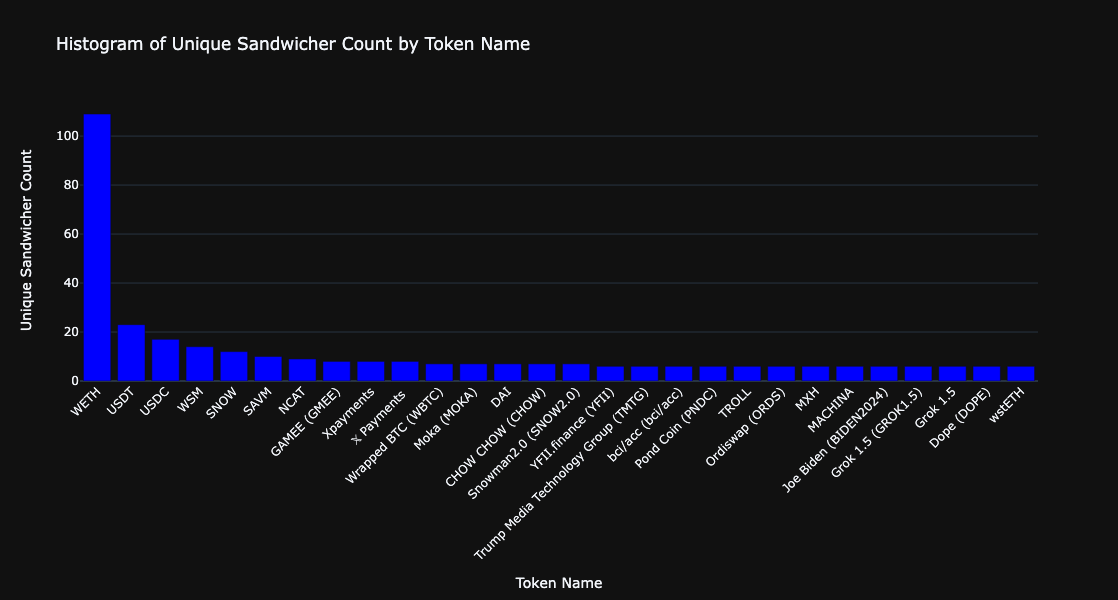

In [264]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=profit_token_hist_without_other['name'],
    y=profit_token_hist_without_other['unique_sandwicher_count'],
    marker_color='blue'
))

fig.update_layout(
    title='Histogram of Unique Sandwicher Count by Token Name',
    xaxis_title='Token Name',
    yaxis_title='Unique Sandwicher Count',
    xaxis_tickangle=-45,  
    template='plotly_dark',  
    width=1000, 
    height=600 
)

fig.show()

In [266]:
profit_token_hist_cleaned

,name,unique_sandwicher_count
13,Other,1525
22,WETH,109
21,USDT,23
20,USDC,17
23,WSM,14
16,SNOW,12
15,SAVM,10
11,NCAT,9
4,GAMEE (GMEE),8
25,Xpayments,8


### динаміка

#### code

In [205]:
profit_token_dynamics = pd.read_csv('Кількість конкурентів за токеном (динаміка).csv')
profit_token_dynamics = profit_token_dynamics.rename(columns={'profit_token_address': 'address'})
profit_token_dynamics

,date,address,unique_sandwicher_count
0,2024-06-25,0x00282fd551d03dc033256c4bf119532e8c735d8a,1
1,2024-06-25,0x00c5ca160a968f47e7272a0cfcda36428f386cb6,1
2,2024-06-25,0x01e1d7cbd3bc0eb1030485f33708421011459459,1
3,2024-06-25,0x02d3a27ac3f55d5d91fb0f52759842696a864217,1
4,2024-06-25,0x02e7f808990638e9e67e1f00313037ede2362361,1
...,...,...,...
1529,2024-05-28,0xd29da236dd4aac627346e1bba06a619e8c22d7c5,1
1530,2024-05-24,0x1fdd61ef9a5c31b9a2abc7d39c139c779e8412af,1
1531,2024-05-24,0x2bda9acd2e1a85a7eb7b42284de06fbcb25181fd,1
1532,2024-05-24,0x48d945d00127472f7944bde85db1c37aa4b4b489,1


In [207]:
merged_df = profit_token_dynamics.merge(profit_token_hist[['address', 'name']], on='address', how='left')
merged_df

,date,address,unique_sandwicher_count,name
0,2024-06-25,0x00282fd551d03dc033256c4bf119532e8c735d8a,1,NaN
1,2024-06-25,0x00c5ca160a968f47e7272a0cfcda36428f386cb6,1,NaN
2,2024-06-25,0x01e1d7cbd3bc0eb1030485f33708421011459459,1,NaN
3,2024-06-25,0x02d3a27ac3f55d5d91fb0f52759842696a864217,1,NaN
4,2024-06-25,0x02e7f808990638e9e67e1f00313037ede2362361,1,NaN
...,...,...,...,...
1529,2024-05-28,0xd29da236dd4aac627346e1bba06a619e8c22d7c5,1,NaN
1530,2024-05-24,0x1fdd61ef9a5c31b9a2abc7d39c139c779e8412af,1,NaN
1531,2024-05-24,0x2bda9acd2e1a85a7eb7b42284de06fbcb25181fd,1,NaN
1532,2024-05-24,0x48d945d00127472f7944bde85db1c37aa4b4b489,1,NaN


In [210]:
merged_df.fillna('Other')

,date,address,unique_sandwicher_count,name
0,2024-06-25,0x00282fd551d03dc033256c4bf119532e8c735d8a,1,Other
1,2024-06-25,0x00c5ca160a968f47e7272a0cfcda36428f386cb6,1,Other
2,2024-06-25,0x01e1d7cbd3bc0eb1030485f33708421011459459,1,Other
3,2024-06-25,0x02d3a27ac3f55d5d91fb0f52759842696a864217,1,Other
4,2024-06-25,0x02e7f808990638e9e67e1f00313037ede2362361,1,Other
...,...,...,...,...
1529,2024-05-28,0xd29da236dd4aac627346e1bba06a619e8c22d7c5,1,Other
1530,2024-05-24,0x1fdd61ef9a5c31b9a2abc7d39c139c779e8412af,1,Other
1531,2024-05-24,0x2bda9acd2e1a85a7eb7b42284de06fbcb25181fd,1,Other
1532,2024-05-24,0x48d945d00127472f7944bde85db1c37aa4b4b489,1,Other


In [246]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

#### plot

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



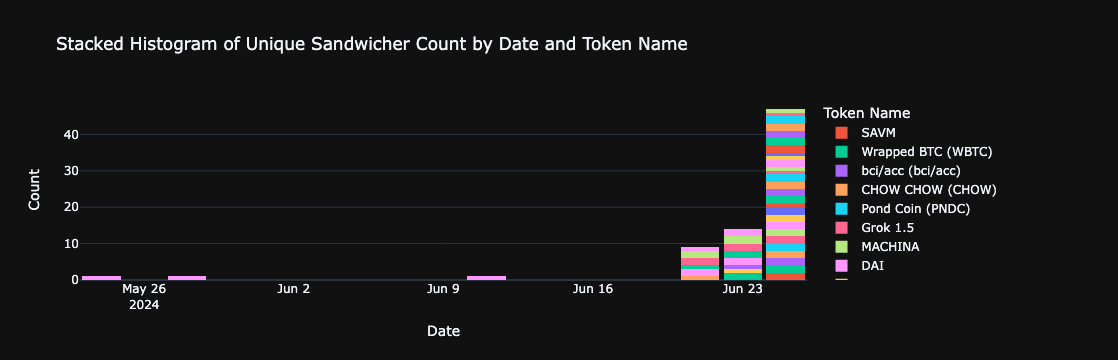

In [254]:
import plotly.express as px
import warnings

with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always") 

fig = px.histogram(
    merged_df,
    x="date",
    color="name",
    barmode="stack",
    nbins=20,
    title='Stacked Histogram of Unique Sandwicher Count by Date and Token Name',
    labels={
        'date': 'Date',
        'unique_sandwicher_count': 'Count',
        'name': 'Token Name'
    }
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Token Name',
    bargap=0.1,
    template='plotly_dark'
)

fig.show()

### 3. Кількість cендвічів за конкурентом

#### code

In [278]:
sandwichers_all = pd.read_csv('Кількість сендвічів по конкуренту (combined).csv')

In [280]:
sandwichers_all

,sandwicher_address,sandwich_count,sandwich_count_weth
0,0x6b75d8af000000e20b7a7ddf000ba900b4009a80,33902,18895.0
1,0x00000000a991c429ee2ec6df19d40fe0c80088b8,3408,3104.0
2,0x000000d40b595b94918a28b27d1e2c66f43a51d3,2957,666.0
3,0x0096913d68a000311266250f0000000000e04c00,1621,1497.0
4,0x0000001d0000f38cc10d0028474a9c180058b091,1243,1211.0
...,...,...,...
143,0x37ef17fe040badb8b308174cfb3c9d948d17dc48,1,NaN
144,0x5dda1dad9f282369521813e7313947c0eca33420,1,NaN
145,0xcb38104958c91e9e51ae995c3c07be4bff9f33fb,1,NaN
146,0xb86e490e72f050c424383d514362dc61dabb1cc3,1,NaN


In [284]:
sandwichers_all_top_5 = sandwichers_all.head(5)
sandwichers_all_top_5

,sandwicher_address,sandwich_count,sandwich_count_weth
0,0x6b75d8af000000e20b7a7ddf000ba900b4009a80,33902,18895.0
1,0x00000000a991c429ee2ec6df19d40fe0c80088b8,3408,3104.0
2,0x000000d40b595b94918a28b27d1e2c66f43a51d3,2957,666.0
3,0x0096913d68a000311266250f0000000000e04c00,1621,1497.0
4,0x0000001d0000f38cc10d0028474a9c180058b091,1243,1211.0


#### plot and table

In [290]:
sandwichers_all_top_5_and_we = pd.concat([sandwichers_all_top_5, pd.DataFrame({'sandwicher_address': ['our address: 0xf50024f746d94f144a79003d00000000e380a500'], 
                                  'sandwich_count': ['76'], 
                                  'sandwich_count_weth' : ['76']})], ignore_index=True)
sandwichers_all_top_5_and_we

,sandwicher_address,sandwich_count,sandwich_count_weth
0,0x6b75d8af000000e20b7a7ddf000ba900b4009a80,33902,18895.0
1,0x00000000a991c429ee2ec6df19d40fe0c80088b8,3408,3104.0
2,0x000000d40b595b94918a28b27d1e2c66f43a51d3,2957,666.0
3,0x0096913d68a000311266250f0000000000e04c00,1621,1497.0
4,0x0000001d0000f38cc10d0028474a9c180058b091,1243,1211.0
5,our address: 0xf50024f746d94f144a79003d0000000...,76,76


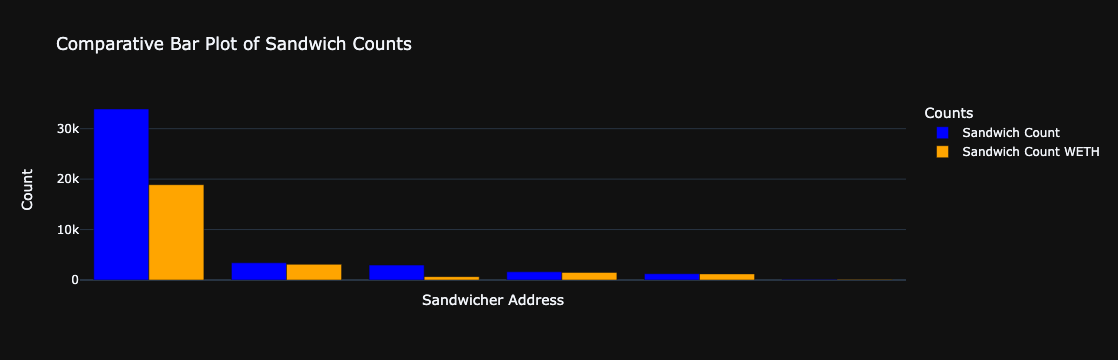

In [294]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sandwichers_all_top_5_and_we['sandwicher_address'],
    y=sandwichers_all_top_5_and_we['sandwich_count'],
    name='Sandwich Count',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=sandwichers_all_top_5_and_we['sandwicher_address'],
    y=sandwichers_all_top_5_and_we['sandwich_count_weth'],
    name='Sandwich Count WETH',
    marker_color='orange'
))

# Customize the layout
fig.update_layout(
    barmode='group',
    title='Comparative Bar Plot of Sandwich Counts',
    xaxis_title='Sandwicher Address',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    xaxis=dict(showticklabels=False),  # Hide x-axis labels
    template='plotly_dark',
    legend_title='Counts'
)

# Show the figure
fig.show()

### 4. Кількість cендвічів за profit token 

#### code

In [514]:
sandwichers_all_by_token = pd.read_csv('_Кількість_сендвічів по токену.csv')

sandwichers_all_by_token_other = add_other(sandwichers_all_by_token, 'address', 'sandwich_count', 500)

sandwichers_all_by_token_grouped = group_table(sandwichers_all_by_token_other, 'address', 'sandwich_count')

sandwichers_all_by_token_merged = merger_func(sandwichers_all_by_token_grouped, 
                                              token_names, 
                                              'address', 'left')

sandwichers_all_by_token_sorted = sandwichers_all_by_token_merged.sort_values(by = 'sandwich_count', ascending = False).reset_index(drop = True)

sandwichers_all_by_token_cleaned = sandwichers_all_by_token_sorted[sandwichers_all_by_token_sorted['address'] != 'Other'].reset_index(drop = True)

#### plot and table

In [520]:
sandwichers_all_by_token_sorted

,address,sandwich_count,name
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,46836,WETH
1,Other,23134,0
2,0xd1f3d2f5c12a205fc912358878b089eae48a557f,1217,SNOW
3,0xf8ebf4849f1fa4faf0dff2106a173d3a6cb2eb3a,841,TROLL
4,0xdac17f958d2ee523a2206206994597c13d831ec7,770,USDT
5,0xf2fdd9c25d7bc8002ce89716d1be484b2d976944,765,&#120143; Payments
6,0x4b1e80cac91e2216eeb63e29b957eb91ae9c2be8,745,NaN
7,0xec21890967a8ceb3e55a3f79dac4e90673ba3c2e,646,NaN
8,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,640,USDC
9,0x3e362038fd3d08887d498944d489af7909619a9b,591,CHOW CHOW (CHOW)


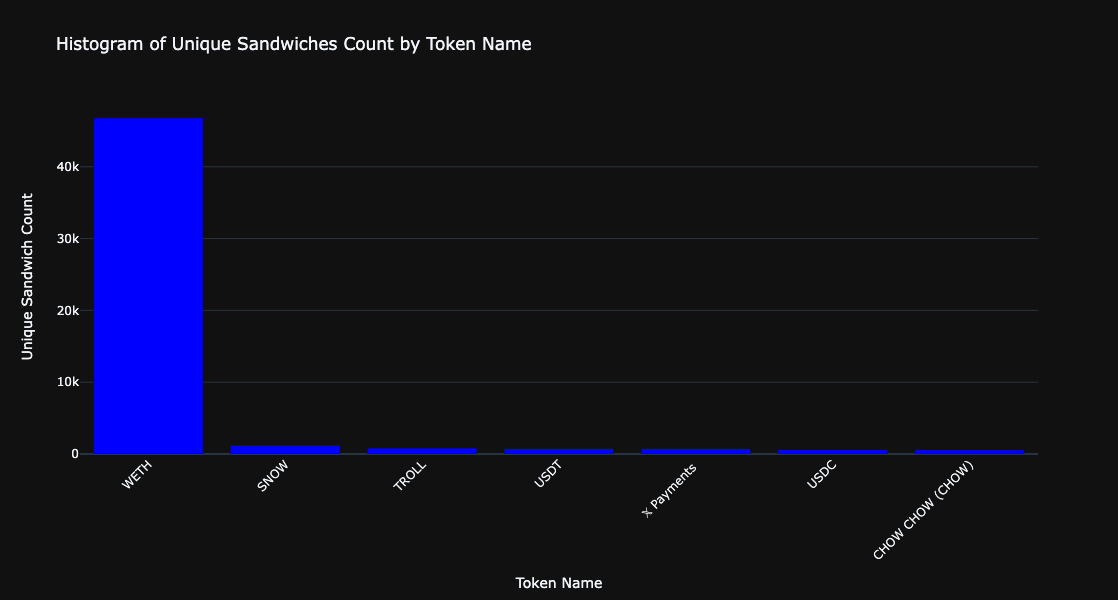

In [518]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sandwichers_all_by_token_cleaned['name'],
    y=sandwichers_all_by_token_cleaned['sandwich_count'],
    marker_color='blue'
))

fig.update_layout(
    title='Histogram of Unique Sandwiches Count by Token Name',
    xaxis_title='Token Name',
    yaxis_title='Unique Sandwich Count',
    xaxis_tickangle=-45,  
    template='plotly_dark',  
    width=1000, 
    height=600 
)

fig.show()

### 5.a Чи є кілька сендвічів в блоці? (не графік) (більше 1го сендвічу на 1 блок) Зберегти такі кейси

### 5.b Середня к-ть сендвічів на проміжок в 300=1год блоків (від першого до останнього блоку) 

#### code

In [642]:
blocks_sandwiches = pd.read_csv('block_sandwich_id.csv')

In [644]:
blocks_sandwiches

,block_number,id
0,20131316,3fd08e5e-9334-4d47-ac5d-bc549075831f
1,20131317,98ef1529-cb90-49a8-a252-4d87f7300b77
2,19939664,012ca4b4-9cff-488b-8606-c2a317e5e115
3,19939665,60e44499-8ff1-4b78-824b-df4fda33f058
4,19939667,7a48fc3e-f583-41a8-911c-470137b2b2d0
...,...,...
79857,19134497,f2109ee1-2ea0-42d1-abcc-379f2522330f
79858,19134497,9867a743-3149-4c4e-a762-218876385ce8
79859,19134503,89571b81-91c4-4269-80a0-ff6aedf6d6c9
79860,19134504,e3347374-a2c2-4513-a24f-c714810aa45c


In [646]:
blocks = pd.DataFrame(blocks_sandwiches['block_number'].unique(), 
                      columns=['block_number']).sort_values(by='block_number',
                                                            ascending=True).reset_index(drop = True)

In [650]:
min_block = blocks['block_number'].min()


list_ = [min_block]
for i in range(len(blocks['block_number'])): 
    group = list_[-1] + 300
    list_.append(group)

list_ = list_[1:]

In [652]:
group_dict = {key: idx + 1 for idx, key in enumerate(list_)}

In [654]:
def get_group(block_number, group_dict):
    for key in sorted(group_dict.keys()):
        if block_number <= key:
            return group_dict[key]
    return len(group_dict)  # In case the block number exceeds all boundaries

# Assign groups to the block numbers
blocks['group'] = blocks['block_number'].apply(get_group, args=(group_dict,))

In [655]:
blocks.sort_values(by = 'block_number')

,block_number,group
0,12775690,1
1,19043857,20894
2,19043862,20894
3,19043863,20894
4,19043865,20894
...,...,...
46660,20132454,24523
46661,20132455,24523
46662,20132456,24523
46663,20132457,24523


In [658]:
blocks_sandwichers_merged = merger_func(blocks_sandwichers, blocks, 'block_number', 'left')

In [660]:
blocks_sandwichers_grouped = blocks_sandwichers_merged.groupby(['group']).agg(
    {'sandwicher_address': 'count'}
    ).reset_index()

#### result

In [662]:
blocks_sandwichers_grouped['sandwicher_address'].describe(percentiles = [0.75,0.99,0.999])

count    304.000000
mean     271.664474
std      101.007626
min        1.000000
50%      264.000000
75%      316.500000
99%      566.910000
99.9%    657.364000
max      661.000000
Name: sandwicher_address, dtype: float64

In [666]:
print(f"Середнє на 300 блоків - {blocks_sandwichers_grouped['sandwicher_address'].mean()}, найчастіше значення (мода) -  {round(blocks_sandwichers_grouped['sandwicher_address'].mode()[0], 2)} та 50 % усіх середніх менше {blocks_sandwichers_grouped['sandwicher_address'].median()}. Середнє відхилення від avg - 101")

Середнє на 300 блоків - 271.6644736842105, найчастіше значення (мода) -  269 та 50 % усіх середніх менше 264.0. Середнє відхилення від avg - 101
